In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import operator
from collections import OrderedDict
from sklearn import preprocessing
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [5]:
all_contracts = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Current%20NBA%20Players%20Contracts%20History/nba_contracts_history.csv')
all_contracts["AGE"] = all_contracts["AGE"].astype(int)
all_contracts["AVG_SALARY"] = all_contracts["AVG_SALARY"].astype(int)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
all_contracts.loc[:, ["NAME","AGE", "CONTRACT_START", "CONTRACT_END", "AVG_SALARY"]].sort_values(by="AVG_SALARY", ascending=False).head(10)

,NAME,AGE,CONTRACT_START,CONTRACT_END,AVG_SALARY
99,Kevin Durant,29,2018,2019,33599500
152,LeBron James,31,2016,2017,32124579
17,Kyle Lowry,31,2017,2019,31633333
116,Gordon Hayward,27,2017,2020,31214295
88,James Harden,26,2016,2019,30902124
71,Russell Westbrook,27,2016,2018,30168166
48,Paul Millsap,32,2017,2019,30116666
51,Al Horford,30,2016,2019,27800803
191,Kevin Durant,28,2017,2018,27500000
164,LeBron James,30,2015,2016,26966975


In [6]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
all_contracts.loc[:, ["NAME","AGE", "CONTRACT_START", "CONTRACT_END", "AVG_SALARY"]].sort_values(by="AVG_SALARY", ascending=False).head(10)

,NAME,AGE,CONTRACT_START,CONTRACT_END,AVG_SALARY
99,Kevin Durant,29,2018,2019,33599500
152,LeBron James,31,2016,2017,32124579
17,Kyle Lowry,31,2017,2019,31633333
116,Gordon Hayward,27,2017,2020,31214295
88,James Harden,26,2016,2019,30902124
71,Russell Westbrook,27,2016,2018,30168166
48,Paul Millsap,32,2017,2019,30116666
51,Al Horford,30,2016,2019,27800803
191,Kevin Durant,28,2017,2018,27500000
164,LeBron James,30,2015,2016,26966975


Text(0.5, 0, 'Age')

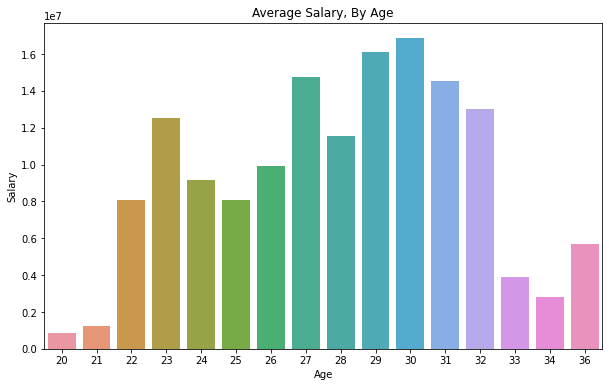

In [7]:
plt.figure(figsize=(10,6))
plt.title("Average Salary, By Age")

sns.barplot(x=all_contracts.AGE, y=all_contracts['AVG_SALARY'], ci=None)

plt.ylabel("Salary")
plt.xlabel("Age")

Text(0.5, 20.80000000000002, '+/-')

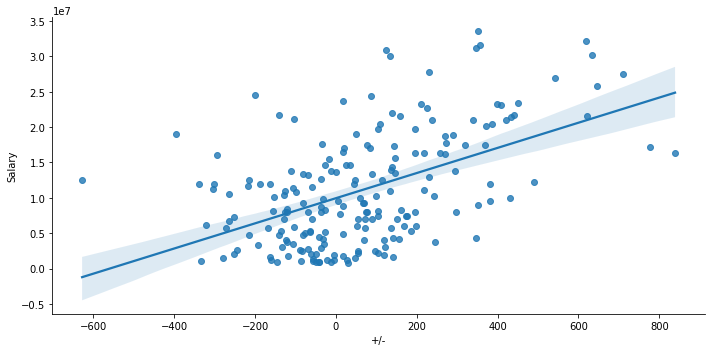

In [8]:
sns.lmplot(x="+/-", y="AVG_SALARY", data=all_contracts,aspect=2)

plt.ylabel("Salary")
plt.xlabel("+/-")

<AxesSubplot:>

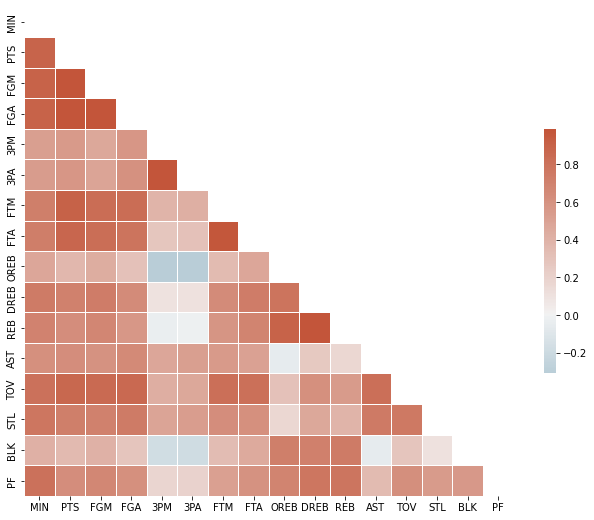

In [9]:
player_stats = all_contracts.drop(columns=["NAME", "AGE", "CONTRACT_START", "CONTRACT_END", "GP", 
                                           "AVG_SALARY", "+/-", "FG%", "3P%", "FT%", "W", "L"])
stats_normalized = (player_stats-player_stats.mean()) / player_stats.std()

corr = stats_normalized.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
all_contracts_clean = all_contracts.drop(columns=["NAME", "CONTRACT_START", "CONTRACT_END"])

X_full = all_contracts_clean[:139]
X_test_full = all_contracts_clean[140:]

y = X_full.AVG_SALARY
X = X_full.drop(columns=["AVG_SALARY"])

y_test = X_test_full.AVG_SALARY
X_test = X_test_full.drop(columns=["AVG_SALARY"])


X = X.select_dtypes(exclude=['object'])
X_test = X_test.select_dtypes(exclude=['object'])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9, test_size=0.1,
                                                      random_state=0)

In [12]:
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
contracts_preds = model.predict(X_valid)
print(f"Validation MAE for Random Forest Model: {mean_absolute_error(y_valid, contracts_preds)}")

Validation MAE for Random Forest Model: 1674772.883571429


In [13]:
importance = model.feature_importances_
columns_names = list(X.columns)
importance_sorted_list = sorted(zip(importance ,columns_names), reverse=True)
for v in (importance_sorted_list):
    print(f"{v[1]} - Score: {round(v[0], 3)}")

PTS - Score: 0.184
FTM - Score: 0.182
FTA - Score: 0.157
FGM - Score: 0.089
+/- - Score: 0.078
DREB - Score: 0.042
L - Score: 0.041
FGA - Score: 0.035
TOV - Score: 0.024
AGE - Score: 0.022
BLK - Score: 0.019
3P% - Score: 0.015
W - Score: 0.013
REB - Score: 0.012
AST - Score: 0.012
MIN - Score: 0.011
GP - Score: 0.011
3PA - Score: 0.008
FG% - Score: 0.008
STL - Score: 0.008
FT% - Score: 0.007
3PM - Score: 0.007
PF - Score: 0.007
OREB - Score: 0.006
